In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import shap
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
print("Первые 5 строк исходных данных:")
print(data.head())

Первые 5 строк исходных данных:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
cols_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_replace] = data[cols_replace].replace(0, np.nan)
print("\nКоличество пропусков после замены 0 на NaN:")
print(data.isnull().sum())


Количество пропусков после замены 0 на NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [8]:
imputer = SimpleImputer(strategy='median')
data[cols_replace] = imputer.fit_transform(data[cols_replace])
data[cols_replace]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,125.0,33.6
1,85.0,66.0,29.0,125.0,26.6
2,183.0,64.0,29.0,125.0,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9
764,122.0,70.0,27.0,125.0,36.8
765,121.0,72.0,23.0,112.0,26.2
766,126.0,60.0,29.0,125.0,30.1


In [7]:
features = data.drop('Outcome', axis=1)
target = data['Outcome']
target

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [6]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)
features_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.298896,2.150354,0.455573,0.064737,-0.908682,2.532136
764,-0.547919,0.011301,-0.197433,-0.239949,-0.181541,0.632365,-0.398282,-0.531023
765,0.342981,-0.021574,-0.031990,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760
766,-0.844885,0.142800,-1.024647,-0.012301,-0.181541,-0.342790,-0.371101,1.170732


In [10]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, 
                                                    test_size=0.2, random_state=5642189, stratify=target)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
142,-0.547919,-0.448946,-1.686419,-0.353773,-0.899742,0.006519,-0.464725,-0.956462
418,-0.844885,-1.270815,-0.362876,-0.012301,-0.181541,-2.074783,0.459432,-0.531023
105,-0.844885,0.142800,-1.355533,-0.012301,0.131224,-0.546554,0.993993,-1.041549
6,-0.250952,-1.435189,-1.851862,0.329171,-0.610145,-0.211799,-0.676133,-0.616111
673,-0.250952,0.044175,2.284211,0.670643,1.150606,3.616050,1.232582,-0.956462
...,...,...,...,...,...,...,...,...
493,0.046014,0.109925,-0.197433,-1.264365,-0.216293,-0.517445,2.029893,1.000557
458,1.827813,0.866045,0.960667,2.150354,1.115854,0.748802,1.598016,1.511083
546,0.342981,2.148161,0.298896,-0.239949,0.768338,1.622075,1.697680,1.681259
281,1.827813,0.241424,0.298896,-0.126125,-0.216293,0.501374,-0.579489,0.490030


In [11]:
smote = SMOTE(random_state=9871289)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("\nРазмеры выборок после применения SMOTE:")
print("X_train_res:", X_train_res.shape, "y_train_res:", y_train_res.shape)


Размеры выборок после применения SMOTE:
X_train_res: (800, 8) y_train_res: (800,)


In [12]:
model = RandomForestClassifier(random_state=879561)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=879561)

In [13]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("\nТочность модели на тестовой выборке:", acc)
print("\nОтчет по классификации:")
print(classification_report(y_test, y_pred))


Точность модели на тестовой выборке: 0.7467532467532467

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       100
           1       0.65      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154



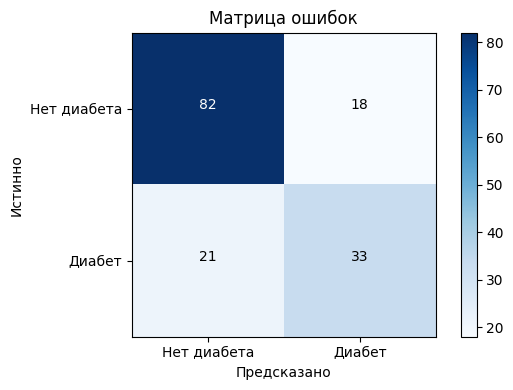

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Матрица ошибок")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Нет диабета', 'Диабет'])
plt.yticks(tick_marks, ['Нет диабета', 'Диабет'])
plt.xlabel("Предсказано")
plt.ylabel("Истинно")
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()


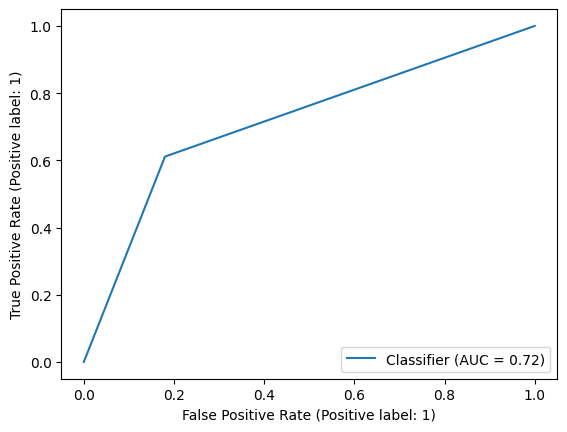

In [22]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred)



Ранжирование признаков по важности:
1. Glucose: 0.2524
2. BMI: 0.1625
3. Age: 0.1450
4. DiabetesPedigreeFunction: 0.1075
5. Pregnancies: 0.0944
6. BloodPressure: 0.0858
7. Insulin: 0.0767
8. SkinThickness: 0.0757


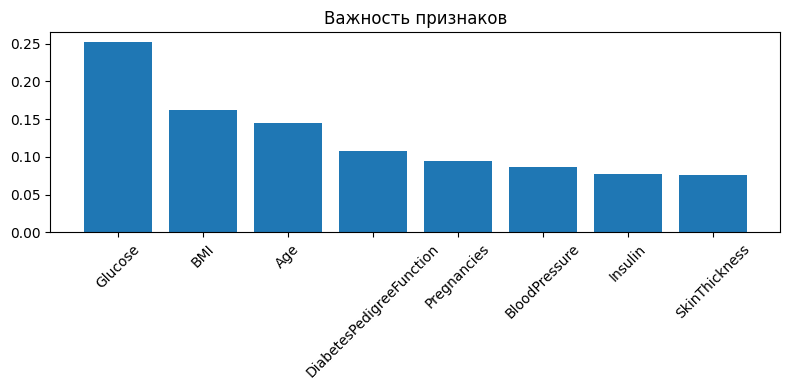

In [15]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("\nРанжирование признаков по важности:")
for f in range(features.shape[1]):
    print(f"{f+1}. {features.columns[indices[f]]}: {importances[indices[f]]:.4f}")

plt.figure(figsize=(8, 4))
plt.title("Важность признаков")
plt.bar(range(features.shape[1]), importances[indices], align="center")
plt.xticks(range(features.shape[1]), features.columns[indices], rotation=45)
plt.tight_layout()
plt.show()

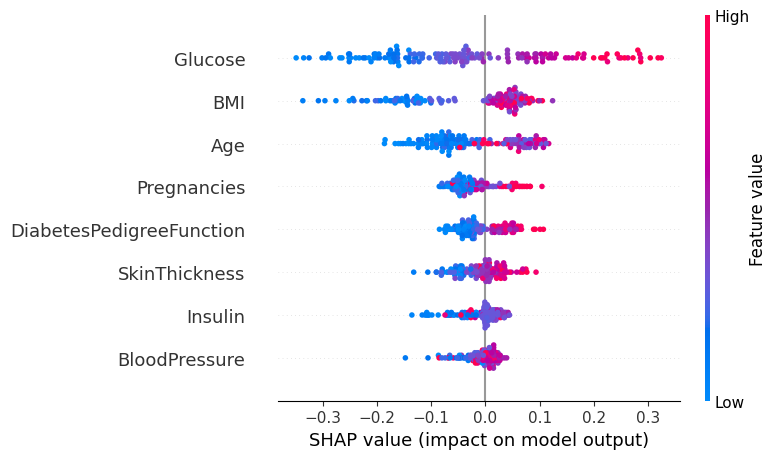

In [16]:
explainer = shap.TreeExplainer(model)
# Вычисляем SHAP-значения для тестовой выборки
shap_values = explainer.shap_values(X_test)
# Визуализация summary plot для класса 1 (диабет)
shap.summary_plot(shap_values[1], X_test, feature_names=features.columns)


In [17]:
errors = X_test[y_test != y_pred]
errors_true = y_test[y_test != y_pred]
errors_pred = pd.Series(y_pred[y_test != y_pred], index=errors.index)
print("\nКоличество неправильно классифицированных объектов:", len(errors))
print("\nНекоторые примеры ошибок:")
print(errors.assign(Истинная_метка=errors_true, Предсказанная=errors_pred).head())



Количество неправильно классифицированных объектов: 39

Некоторые примеры ошибок:
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
93      0.046014  0.405798      -0.031990      -0.012301 -0.181541 -1.259727   
284    -0.547919 -0.448946       0.629782      -0.012301 -0.181541 -0.793982   
40     -0.250952  1.918037      -0.693761      -0.467597 -0.818655  0.224838   
326    -0.844885  0.011301      -0.693761       0.329171  0.177559  0.384938   
260    -0.250952  2.279660      -0.362876      -1.605837 -0.123622 -0.226354   

     DiabetesPedigreeFunction       Age  Истинная_метка  Предсказанная  
93                  -0.588550  2.276873               1              0  
284                 -0.642912  1.596171               1              0  
40                  -0.606670 -0.616111               0              1  
326                  0.664800 -0.275760               1              0  
260                 -0.522107  0.064591               0              1 

In [19]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=231564), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_res, y_train_res)
print("\nЛучшие параметры, найденные GridSearchCV:")
print(grid_search.best_params_)


Лучшие параметры, найденные GridSearchCV:
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [21]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nТочность улучшенной модели:", accuracy_score(y_test, y_pred_best))
print("\nОтчет по классификации для улучшенной модели:")
print(classification_report(y_test, y_pred_best))


Точность улучшенной модели: 0.7597402597402597

Отчет по классификации для улучшенной модели:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       100
           1       0.66      0.65      0.65        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



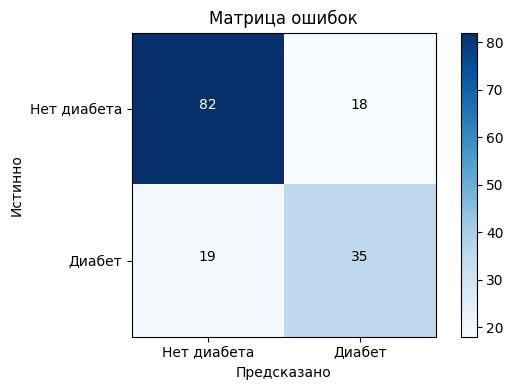

In [23]:
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Матрица ошибок")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Нет диабета', 'Диабет'])
plt.yticks(tick_marks, ['Нет диабета', 'Диабет'])
plt.xlabel("Предсказано")
plt.ylabel("Истинно")
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

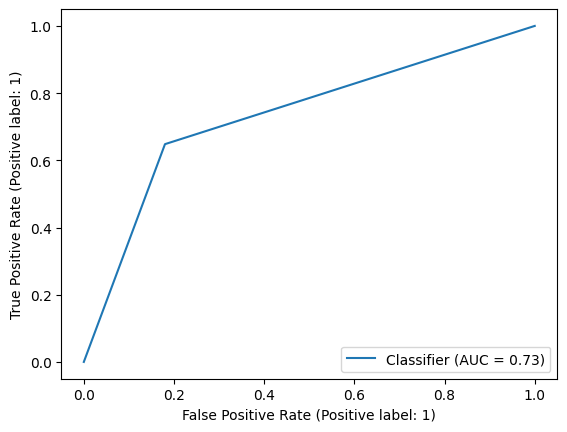

In [24]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred_best)
